In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots as _

plt.style.use(["science", "nature"])

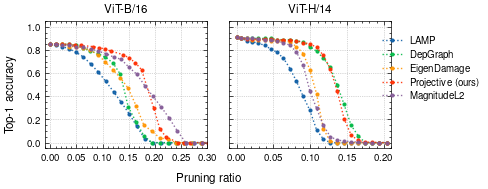

In [2]:
dir = pathlib.Path("outputs")
form = "uniform"
models = ["vit_b_16", "vit_h_14"]
names = ["ViT-B/16", "ViT-H/14"]
names = [f"{n}" for n in names]
experiments = ["lamp", "depgraph", "eigen", "proj", "l2"]
experiment_names = [
    "LAMP",
    "DepGraph",
    "EigenDamage",
    "Projective (ours)",
    "MagnitudeL2",
]
experiment_names = [f"{n}" for n in experiment_names]

fig, axes = plt.subplots(1, 2, figsize=(5, 2), layout="tight", sharey=True)

for model, title, ax in zip(models, names, axes.flat):
    for experiment, name in zip(experiments, experiment_names):
        exdir = dir / form / model / experiment

        df = pd.read_csv(exdir / "results.csv")
        df["params_pct"] = 1 - df["params"] / df["params"].max()
        ax.plot(
            df["params_pct"],
            df["acc1"],
            label=name,
            linewidth=1,
            linestyle="dotted",
            marker=".",
            markersize=4,
            alpha=0.9,
        )

    ax.set_title(title)
    ax.grid(linestyle="dotted")
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlim(-0.01, 0.21)

    if ax is axes[1]:
        ax.legend(bbox_to_anchor=(1.6, 0.95))
        ticks = np.arange(df["params_pct"].min(), df["params_pct"].max(), 0.05)
        ax.set_xticks(ticks)
    else:
        ticks = np.arange(df["params_pct"].min(), df["params_pct"].max(), 0.05)
        ax.set_xticks(ticks)


fig.supylabel(r"Top-1 accuracy")
fig.supxlabel(r"Pruning ratio", x=0.43, y=0.05)

plt.savefig("vit_uniform.svg")
plt.show()

In [3]:
# dir = pathlib.Path("outputs")
# form = "adaptive"
# models = ["vit_b_16", "vit_l_16", "vit_h_14"]
# names = ["ViT-B/16", "ViT-L/16", "ViT-H/14"]
# experiments = ["l2", "proj000", "proj500", "proj550"]
# experiment_names = ["Norm ($L_2$)", "Proj. (no redist.)", "Proj. ($W,b$)", "Proj. ($W,b,V$)"]

# fig, axes = plt.subplots(1, 3, figsize=(11, 3.6), layout="tight")
# fig.suptitle("Pruning ViT models on ImageNet (no fine-tuning)")

# for model, title, ax in zip(models, names, axes.flat):
#     maxes = []
#     for experiment, name in zip(experiments, experiment_names):
#         exdir = dir / form / model / experiment

#         df = pd.read_csv(exdir / "results.csv")
#         df["params_pct"] = 1 - df["params"] / df["params"].max()
#         ax.plot(df["params_pct"], df["acc1"], label=name, linewidth=1)

#         ax.set_title(title)
#         ax.grid(alpha=0.6)
#         maxes.append(df["params_pct"].max())
#     ax.hlines(df["acc1"][0], 0, max(maxes), linestyles="--", color="black", linewidth=0.8, label="Original accuracy")

#     if model == "vit_b_16":
#         ax.set_ylabel("Top-1 accuracy [\\%]")
#     if model == "vit_l_16":
#         ax.legend(loc="upper right")
#         ax.set_xlabel("Pruning ratio in transformer blocks")

# plt.savefig("vit_adaptive.svg")
# plt.show()